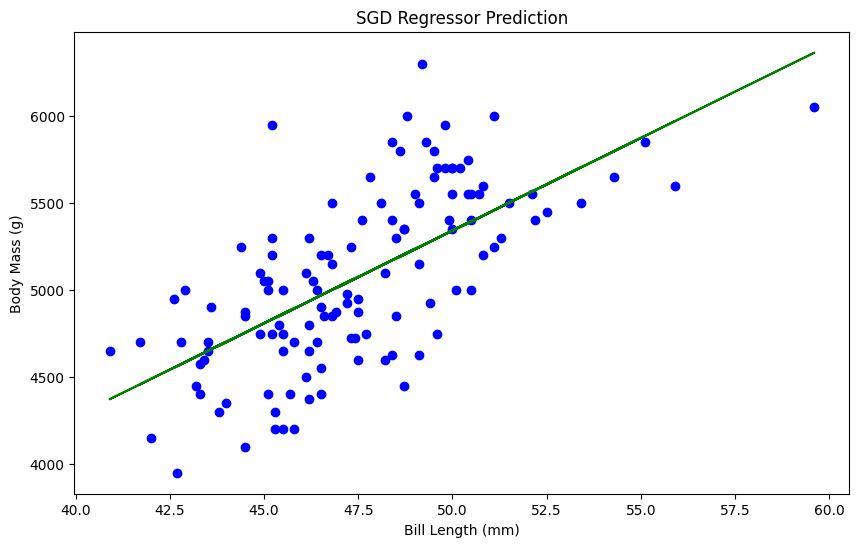

In [10]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# データセットのロード
penguins = sns.load_dataset('penguins')

# NaN値を除去
penguins = penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

# Gentooペンギンのデータのみを抽出
gentoo = penguins[penguins.species == 'Gentoo']

# くちばしの長さと体重データを取得
X = gentoo[['bill_length_mm']].values
y = gentoo['body_mass_g'].values

# データのスケーリング
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# SGDRegressorモデルの作成と訓練
sgd_model = SGDRegressor()
sgd_model.fit(X_scaled, y_scaled)

# モデルの予測値を算出
y_scaled_pred = sgd_model.predict(X_scaled)

# 元のデータと予測のプロット
plt.figure(figsize=(10, 6))
plt.scatter(scaler_X.inverse_transform(X_scaled), scaler_y.inverse_transform(y_scaled.reshape(1, -1)), color='blue')
plt.plot(scaler_X.inverse_transform(X_scaled), scaler_y.inverse_transform(y_scaled_pred.reshape(-1, 1)), color='green')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('SGD Regressor Prediction')

# 図を保存
plt.savefig('scatter_sgd.png')

# グラフを表示
plt.show()


In [9]:
y2=y_scaled_pred.reshape(1, -1)
y3=y_scaled_pred.reshape(-1, 1)